In [70]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [71]:
#!cat howlongtobeat_playtimes.csv

In [72]:
pd.read_csv('howlongtobeat_playtimes.csv')

,average_rating,game_description,game_genres,game_id,game_name,game_name_alias,north_america_release_date,rating_count,systems_available,time_to_beat_completionist,...,time_to_beat_completionist_leisure,time_to_beat_completionist_rushed,time_to_beat_main_extras,time_to_beat_main_extras_count,time_to_beat_main_extras_leisure,time_to_beat_main_extras_rushed,time_to_beat_main_story,time_to_beat_main_story_count,time_to_beat_main_story_leisure,time_to_beat_main_story_rushed
0,86.0,BioShock Infinite is a first-person shooter li...,"First-Person, Action, Shooter",1068,\nBioShock Infinite,NaN,"March 26, 2013",3200.0,"PC, Nintendo Switch, PlayStation 3, PlayStatio...",1708.0,...,3696.0,1108.0,975.0,2000.0,1878.0,645.0,710,2900.0,1310,497
1,92.0,Red Dead Redemption 2 is an epic tale of life ...,"Third-Person, Action, Adventure, Open World, S...",27100,\nRed Dead Redemption 2,NaN,"October 26, 2018",1100.0,"Google Stadia, PC, PlayStation 4, Xbox, Xbox One",10099.0,...,16346.0,6858.0,4781.0,1200.0,9364.0,3167.0,2873,618.0,3956,2009
2,82.0,Choose your fate in Assassin's Creed Odyssey.\...,"Third-Person, Action, Open World, Role-Playing",57503,\nAssassin's Creed Odyssey,NaN,"October 04, 2018",726.0,"Google Stadia, PC, PlayStation 4, Xbox, Xbox One",8042.0,...,21225.0,5411.0,4931.0,1000.0,11102.0,3302.0,2488,395.0,3048,1811
3,86.0,You've come here for a reason. The Union Aeros...,"First-Person, Shooter",2708,\nDoom (2016),NaN,"May 13, 2016",1800.0,"PC, Nintendo Switch, PlayStation 4, Xbox One",1602.0,...,3761.0,1102.0,1013.0,1400.0,2489.0,692.0,710,1500.0,1130,470
4,87.0,"Portal is a new single player game from Valve,...","First-Person, Platform, Puzzle",7230,\nPortal,NaN,"October 09, 2007",2900.0,"PC, PlayStation 3, Xbox, Xbox 360, Xbox One",592.0,...,2113.0,313.0,323.0,948.0,849.0,185.0,195,3600.0,513,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3867,94.0,Inaba a quiet town in rural Japan. A normal te...,"Third-Person, Turn-Based, Role-Playing, Simula...",6974,\nPersona 4 Golden,NaN,"November 20, 2012",806.0,"PC, PlayStation Vita",8554.0,...,13246.0,5883.0,5145.0,786.0,7928.0,3440.0,4176,598.0,7391,2875
3868,91.0,"Hollow Knight is a challenging, beautiful acti...","Action, Adventure",26286,\nHollow Knight,Hollow Knight: Voidheart Edition,"February 24, 2017",1100.0,"PC, Nintendo Switch, PlayStation 4, Xbox One",3416.0,...,7512.0,2312.0,2354.0,1200.0,4518.0,1414.0,1574,657.0,3304,923
3869,86.0,Battle through an onslaught of mystical backwa...,"First-Person, Action, Shooter",50829,\nDUSK,NaN,"December 10, 2018",72.0,PC,1054.0,...,1435.0,811.0,641.0,33.0,910.0,505.0,433,67.0,603,322
3870,82.0,In the latest rhythmic action-adventure from B...,"Top-Down, Action, Music/Rhythm",65732,\nCadence of Hyrule,Cadence of Hyrule - Crypt of the NecroDancer f...,"June 13, 2019",159.0,Nintendo Switch,573.0,...,1144.0,411.0,459.0,127.0,767.0,334.0,345,107.0,468,222


In [73]:
hltb_df = pd.read_csv('howlongtobeat_playtimes.csv')

In [74]:
#hltb_df

In [75]:
# hltb_df.loc[17]

In [76]:
print(np.sum(hltb_df.isnull(), axis=0))

average_rating                           0
game_description                        84
game_genres                           1549
game_id                                  0
game_name                                0
game_name_alias                       3246
north_america_release_date              66
rating_count                             0
systems_available                        0
time_to_beat_completionist             112
time_to_beat_completionist_count       112
time_to_beat_completionist_leisure     112
time_to_beat_completionist_rushed      112
time_to_beat_main_extras                34
time_to_beat_main_extras_count          34
time_to_beat_main_extras_leisure        34
time_to_beat_main_extras_rushed         34
time_to_beat_main_story                  0
time_to_beat_main_story_count            0
time_to_beat_main_story_leisure          0
time_to_beat_main_story_rushed           0
dtype: int64


In [157]:
hltb_df_splitgenres = hltb_df.copy()
hltb_df_splitgenres.dropna(subset=['game_genres'], inplace=True)
hltb_df_splitgenres.index = range(len(hltb_df_splitgenres.index))
# hltb_df_splitgenres.head(20)

In [158]:
hltb_df_splitgenres['game_genres'] = hltb_df_splitgenres['game_genres'].apply(lambda x: x.split(', '))

In [159]:
# i keeps tracks of index
index=0
# save [index, genre] in a nested list
list_ = []
for item in hltb_df_splitgenres['game_genres']:
    list_.extend(map(lambda x: [index, x.lower()], item))
    index += 1
genre = pd.DataFrame(list_, columns=['index', 'genres'])
# genre.head()
#df_genre.genres

In [160]:
# genre[genre['genres'] == 'visual novel']

# hltb_df_splitgenres

In [161]:
genre = genre.groupby('genres').filter(lambda x : len(x)>5)
# genre.groupby('genres').agg('count')

In [162]:
hltb_df_splitgenres = pd.merge(hltb_df_splitgenres.drop('game_genres', axis=1), genre, how='right', left_index=True, right_on='index')
# hltb_df_splitgenres.head()

(6180, 22)


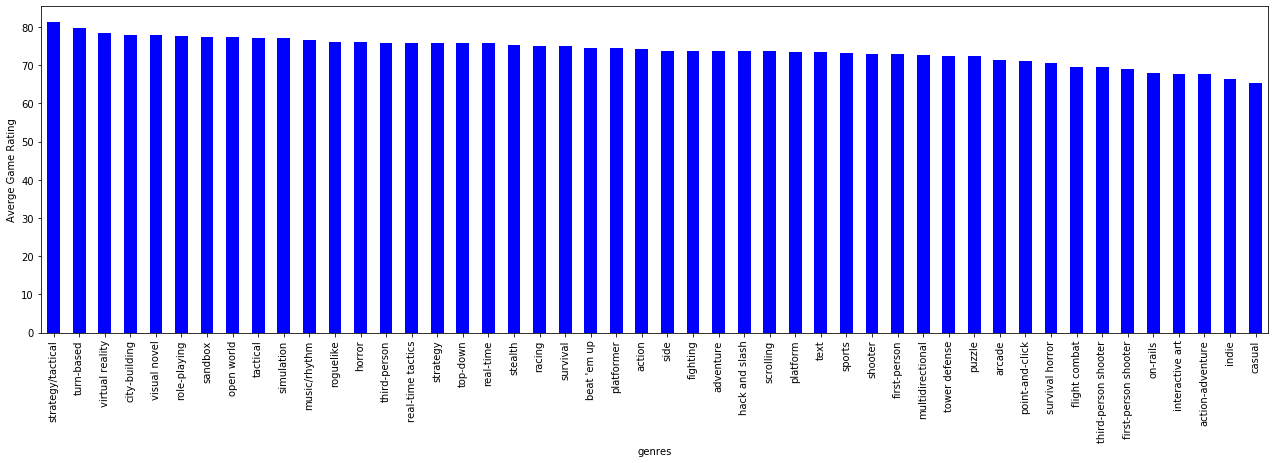

In [163]:
plt.figure(figsize=(22,6))
hltb_df_splitgenres.groupby('genres')['average_rating'].mean().sort_values(ascending=False).plot.bar(color='b')
plt.ylabel('Averge Game Rating')
print(hltb_df_splitgenres.shape)

In [164]:
hltb_df_splitgenres[['time_to_beat_main_story', 'average_rating']].corr()

,time_to_beat_main_story,average_rating
time_to_beat_main_story,1.000000,0.465214
average_rating,0.465214,1.000000


In [169]:
hltb_df_ttb_ms = hltb_df_splitgenres.groupby('genres')[['time_to_beat_main_story', 'average_rating']] \
    .corr().iloc[range(1,96,2),:-1].dropna()

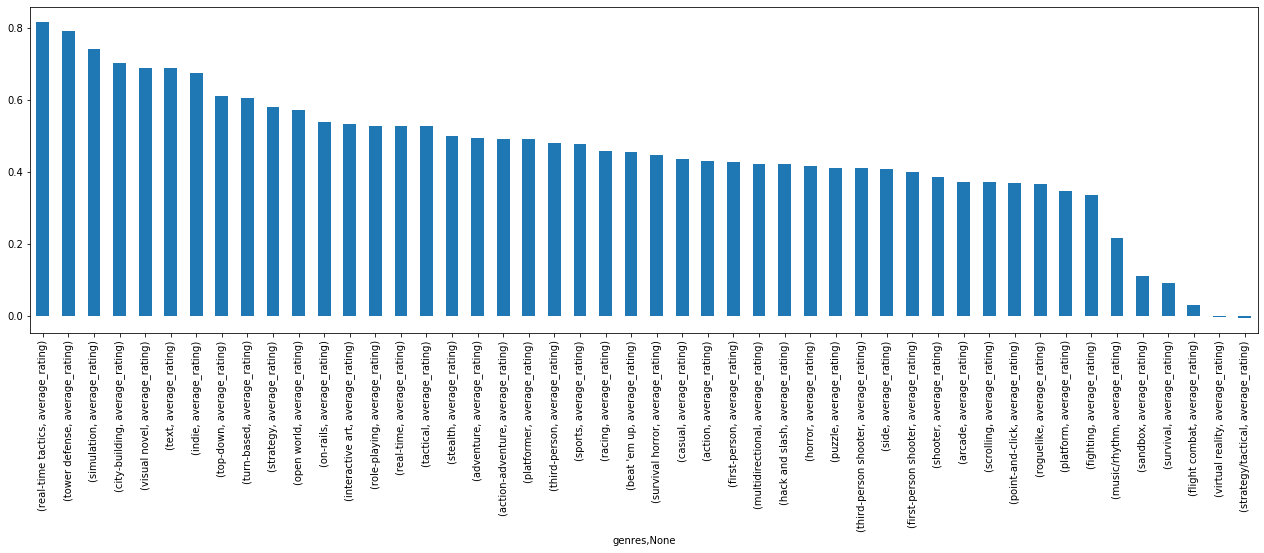

In [177]:
# Main Story - Average

plt.figure(figsize=(22,6))
hltb_df_ttb_ms['time_to_beat_main_story'].sort_values(ascending=False).plot.bar()

In [190]:
# hltb_df_ttb_c

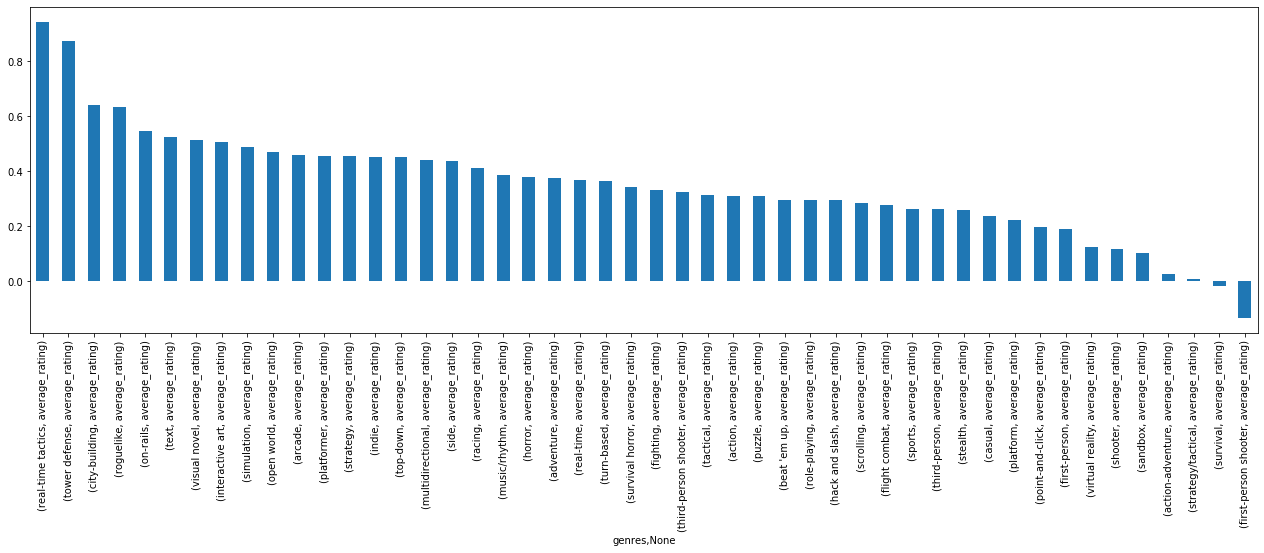

In [230]:
# Completionist - Average

hltb_df_ttb_c = hltb_df_splitgenres.copy()
hltb_df_ttb_c.dropna(subset=['time_to_beat_completionist'], inplace=True)

hltb_df_ttb_c = hltb_df_ttb_c.groupby('genres')[['time_to_beat_completionist', 'average_rating']] \
    .corr().iloc[range(1,96,2),:-1].dropna()

plt.figure(figsize=(22,6))
hltb_df_ttb_c['time_to_beat_completionist'].sort_values(ascending=False).plot.bar()

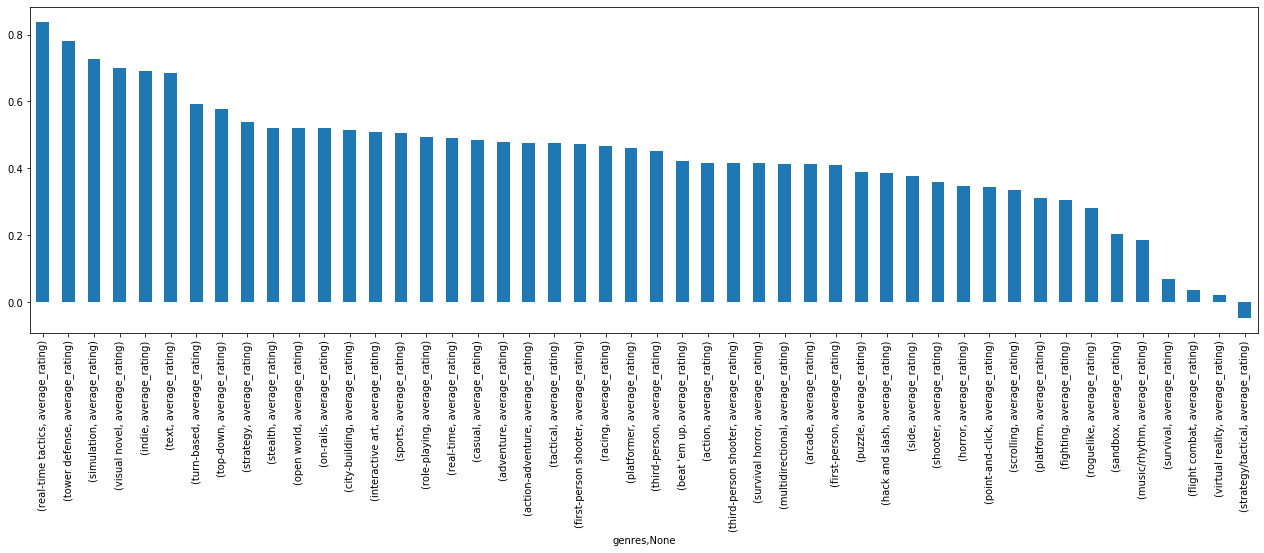

In [231]:
# Main Story - Rushed

hltb_df_ttb_ms_r = hltb_df_splitgenres.copy()
hltb_df_ttb_ms_r.dropna(subset=['time_to_beat_main_story_rushed'], inplace=True)

hltb_df_ttb_ms_r = hltb_df_ttb_ms_r.groupby('genres')[['time_to_beat_main_story_rushed', 'average_rating']] \
    .corr().iloc[range(1,96,2),:-1].dropna()

plt.figure(figsize=(22,6))
hltb_df_ttb_ms_r['time_to_beat_main_story_rushed'].sort_values(ascending=False).plot.bar()

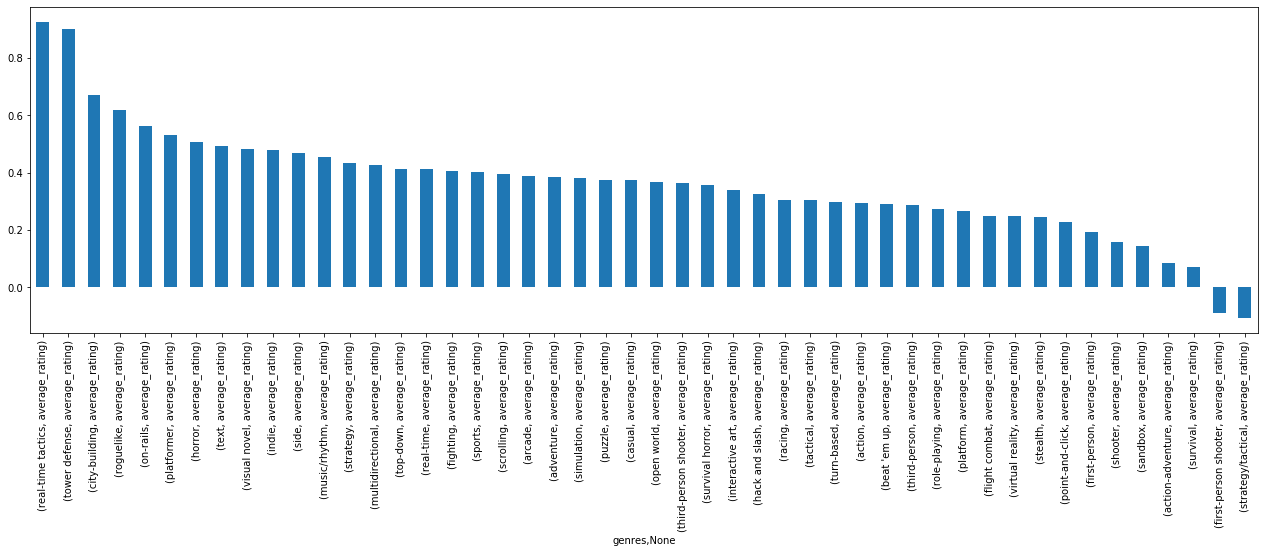

In [232]:
# Completionist - Leisure

hltb_df_ttb_c_l = hltb_df_splitgenres.copy()
hltb_df_ttb_c_l.dropna(subset=['time_to_beat_completionist_leisure'], inplace=True)

hltb_df_ttb_c_l = hltb_df_ttb_c_l.groupby('genres')[['time_to_beat_completionist_leisure', 'average_rating']] \
    .corr().iloc[range(1,96,2),:-1].dropna()

plt.figure(figsize=(22,6))
hltb_df_ttb_c_l['time_to_beat_completionist_leisure'].sort_values(ascending=False).plot.bar()

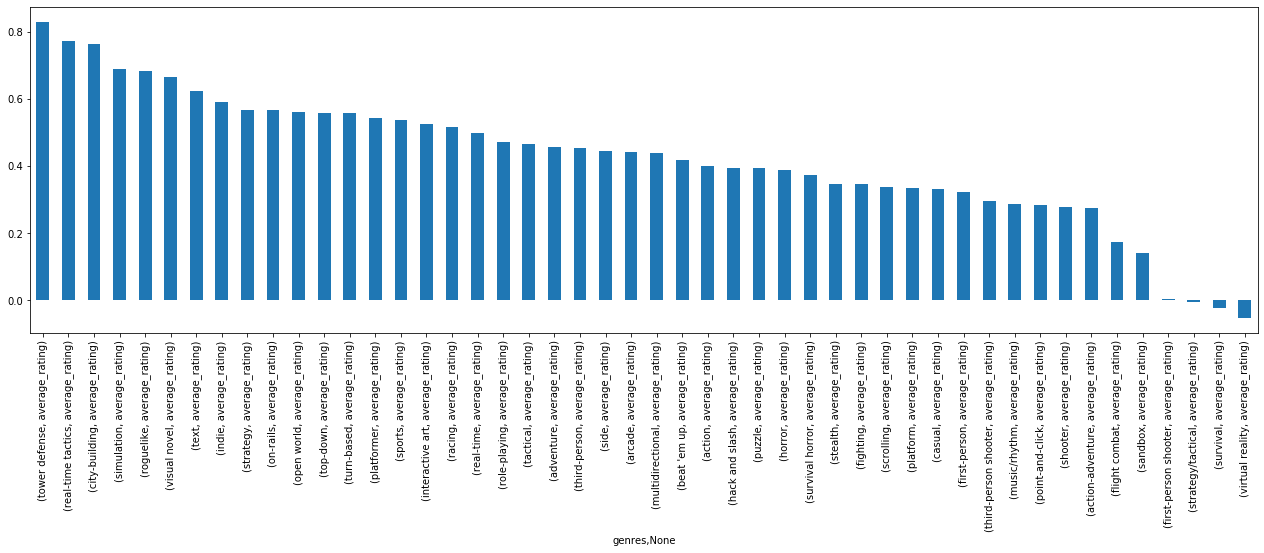

In [233]:
# Main + Extras - Average

hltb_df_ttb_me = hltb_df_splitgenres.copy()
hltb_df_ttb_me.dropna(subset=['time_to_beat_main_extras'], inplace=True)

hltb_df_ttb_me = hltb_df_ttb_me.groupby('genres')[['time_to_beat_main_extras', 'average_rating']] \
    .corr().iloc[range(1,96,2),:-1].dropna()

plt.figure(figsize=(22,6))
hltb_df_ttb_me['time_to_beat_main_extras'].sort_values(ascending=False).plot.bar()

In [218]:
hltb_df_genrecount = hltb_df.copy()
hltb_df_genrecount.dropna(subset=['game_genres'], inplace=True)
hltb_df_genrecount.index = range(len(hltb_df_genrecount.index))
hltb_df_genrecount['game_genres'] = hltb_df_genrecount['game_genres'].apply(lambda x: len(x.split(', ')))

hltb_df_genrecount.head(5)

,average_rating,game_description,game_genres,game_id,game_name,game_name_alias,north_america_release_date,rating_count,systems_available,time_to_beat_completionist,...,time_to_beat_completionist_leisure,time_to_beat_completionist_rushed,time_to_beat_main_extras,time_to_beat_main_extras_count,time_to_beat_main_extras_leisure,time_to_beat_main_extras_rushed,time_to_beat_main_story,time_to_beat_main_story_count,time_to_beat_main_story_leisure,time_to_beat_main_story_rushed
0,86.0,BioShock Infinite is a first-person shooter li...,3,1068,\nBioShock Infinite,NaN,"March 26, 2013",3200.0,"PC, Nintendo Switch, PlayStation 3, PlayStatio...",1708.0,...,3696.0,1108.0,975.0,2000.0,1878.0,645.0,710,2900.0,1310,497
1,92.0,Red Dead Redemption 2 is an epic tale of life ...,5,27100,\nRed Dead Redemption 2,NaN,"October 26, 2018",1100.0,"Google Stadia, PC, PlayStation 4, Xbox, Xbox One",10099.0,...,16346.0,6858.0,4781.0,1200.0,9364.0,3167.0,2873,618.0,3956,2009
2,82.0,Choose your fate in Assassin's Creed Odyssey.\...,4,57503,\nAssassin's Creed Odyssey,NaN,"October 04, 2018",726.0,"Google Stadia, PC, PlayStation 4, Xbox, Xbox One",8042.0,...,21225.0,5411.0,4931.0,1000.0,11102.0,3302.0,2488,395.0,3048,1811
3,86.0,You've come here for a reason. The Union Aeros...,2,2708,\nDoom (2016),NaN,"May 13, 2016",1800.0,"PC, Nintendo Switch, PlayStation 4, Xbox One",1602.0,...,3761.0,1102.0,1013.0,1400.0,2489.0,692.0,710,1500.0,1130,470
4,87.0,"Portal is a new single player game from Valve,...",3,7230,\nPortal,NaN,"October 09, 2007",2900.0,"PC, PlayStation 3, Xbox, Xbox 360, Xbox One",592.0,...,2113.0,313.0,323.0,948.0,849.0,185.0,195,3600.0,513,108


In [224]:
# Main + Extras - Average

# hltb_df_ttb_me = hltb_df_splitgenres.copy()
# hltb_df_ttb_me.dropna(subset=['time_to_beat_main_extras'], inplace=True)

# hltb_df_genrecount['game_genres'].sort_values(ascending=False)

# plt.figure(figsize=(22,6))
# hltb_df_ttb_me['time_to_beat_main_extras'].sort_values(ascending=False).plot.bar()

hltb_df_genrecount.groupby('game_genres').agg('mean')

,average_rating,game_id,rating_count,time_to_beat_completionist,time_to_beat_completionist_count,time_to_beat_completionist_leisure,time_to_beat_completionist_rushed,time_to_beat_main_extras,time_to_beat_main_extras_count,time_to_beat_main_extras_leisure,time_to_beat_main_extras_rushed,time_to_beat_main_story,time_to_beat_main_story_count,time_to_beat_main_story_leisure,time_to_beat_main_story_rushed
game_genres,,,,,,,,,,,,,,,
2,73.195437,18027.689734,146.825856,2233.277259,35.189252,3507.225857,1606.090343,1072.672006,67.621663,1892.303585,742.771167,671.682129,104.853232,990.812928,483.685932
3,74.064014,19513.771626,218.207612,2220.650538,48.014337,3572.387097,1597.498208,1129.797203,113.202797,2028.854895,794.185315,731.102076,149.698962,1060.207612,530.083045
4,75.902878,20367.097122,346.010791,2246.140288,86.773381,4148.964029,1589.730216,1280.496403,231.687050,2508.978417,867.543165,823.938849,219.115108,1242.946043,585.377698
5,76.288462,22404.480769,336.500000,2407.881188,85.970297,4310.970297,1712.069307,1380.096154,227.875000,2576.500000,933.971154,853.625000,222.769231,1303.269231,591.692308
6,79.705882,19359.264706,526.176471,3138.529412,98.029412,6186.294118,2132.117647,1747.735294,345.647059,4173.264706,1107.647059,979.117647,331.558824,1594.235294,678.911765
7,72.500000,23763.625000,228.625000,1800.250000,58.625000,2811.125000,1287.875000,988.000000,140.250000,1802.125000,644.500000,577.750000,125.000000,835.000000,422.750000
8,77.333333,26254.666667,118.000000,3598.000000,16.333333,5728.333333,2694.000000,2044.000000,117.666667,3348.666667,1502.000000,1497.000000,48.666667,1954.666667,1164.000000
9,70.000000,22299.000000,61.500000,1306.000000,9.500000,1563.000000,1090.500000,1102.000000,30.000000,1472.500000,835.500000,938.500000,43.000000,1082.500000,800.000000
11,89.000000,17455.000000,71.000000,12660.000000,17.000000,17835.000000,8865.000000,6204.000000,34.000000,11785.000000,3955.000000,2596.000000,82.000000,3982.000000,1474.000000


In [223]:
hltb_df_genrecount.iloc[1585,:]

average_rating                                                                       89
game_description                      Factorio is a game in which you build and main...
game_genres                                                                          11
game_id                                                                           17455
game_name                                                                   \nFactorio 
game_name_alias                                                                     NaN
north_america_release_date                                                          NaN
rating_count                                                                         71
systems_available                                                                    PC
time_to_beat_completionist                                                        12660
time_to_beat_completionist_count                                                     17
time_to_beat_completionist_leisu

In [225]:
import seaborn as sns

In [229]:
hltb_df_splitgenres.groupby('genres')[['time_to_beat_main_story', 'average_rating']]
# sns.lmplot("genres", "time_to_beat_main_story", hltb_df_ttb_ms)